# What are the effects of each variable on thermal evolution?
(02/08/23)

Variables are:
+ $\phi_{rcmf}$ - rheologically critical melt fraction [0.2,0.5] - params_1
+ $\eta_0$ - reference viscsoity [1e10,1e25]Pas - params_2
+ frht - Arrhenius slope of the viscosity law [0.005,0.08]$K^{-1}$ - params_3
+ $\eta_l$ - liquid viscosity [10,1000]Pas -params_4
+ $X_{S,0}$ - initial core sulfur content [28,32]wt% - params_5
+ $^{60}Fe/^{56}Fe$ - radiogenic iron fraction in accreting material [0,1e-7] - params_6
+ $\alpha_n$ - diffusion vs dislocation creep [25,30] - params_7
+ radius [100,400]km - params_8

For each variable there are two [temperature-time](#Tt), [flux-time](#Ft) and [Rem-t](#Rt) plots for the two endmembers.
There is a [timings](#time) plot across all variables.

## Import libraries <a class="anchor" id="top"></a>
<p align="right">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import data

In [2]:
folder = 'Minirun3/'
subfolders = {'rcmf':1,'eta0':2,'frht':3,'etal':4,'Xs_0':5,'Fe0':6,'alpha_n':7,'r':8}
labels = {'rcmf':'$\\phi_{{RCMF}}$','eta0':'$\\eta_0$','frht':'frht','etal':'$\\eta_l$','Xs_0':'$X_{{s,0}}$','Fe0':'$^{{60}}Fe/^{{56}}Fe$','alpha_n':'$\\alpha_n$','r':'radius'}
Myr = 365*24*3600*1e6 #number of s in Myr

Choose your variable of interest

In [3]:
var = 'r'
varlab = labels[var]
logvar = False
save = True
path = '../Results_combined/'+folder+f"params_{subfolders[var]}/"

Import the temperature profile data for the two endmembers

In [4]:
#find run numbers
var_data = pd.read_csv(path+'auto_params.csv',skiprows=[1])
var_results = pd.read_csv(path+'run_results.csv',skiprows=[1])
data = pd.merge(var_data,var_results,on='run')
minrun = min(var_data['run'])
maxrun = max(var_data['run'])
nrun = len(var_data)

In [5]:
#End member 1
run = int(minrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t1 = npzfile['t']/Myr #time in Myr
d01 = npzfile['d0'] 
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs1 = Flux[0]
Fcmb1 = Flux[1]
Fad1 = Flux[2]
Frad1 = Flux[3]

#get time for switch to conduction
fcond_t1 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]
#Concatenate
Tall_1 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_1 = np.append(tdiff,t1)
d0_all_1 = np.append(d0_diff,d01)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r1 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_1 = np.arange(0,r1+dr,dr)/1e3

In [6]:
#find unstable indices for plotting core stratification
r_unstable1=np.array([]) 
for ind in min_unstable:
    r_unstable1 = np.append(r_unstable1,rplot_1[int(ind)])
rc1 = r1/2

In [7]:
#End member 2
run = int(maxrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t2 = npzfile['t']/Myr #time in Myr 
d02 = npzfile['d0'] 
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs2 = Flux[0]
Fcmb2 = Flux[1]
Fad2 = Flux[2]
Frad2 = Flux[3]
#get time for switch to conduction
fcond_t2 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#Concatenate
Tall_2 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_2 = np.append(tdiff,t2)
d0_all_2 = np.append(d0_diff,d02)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r2 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_2 = np.arange(0,r2+dr,dr)/1e3

In [8]:
#find unstable indices for plotting core stratification
r_unstable2=np.array([]) 
for ind in min_unstable:
    r_unstable2 = np.append(r_unstable2,rplot_2[int(ind)])
rc2 = r2/2

## Temperature profiles <a class="anchor" id="Tt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

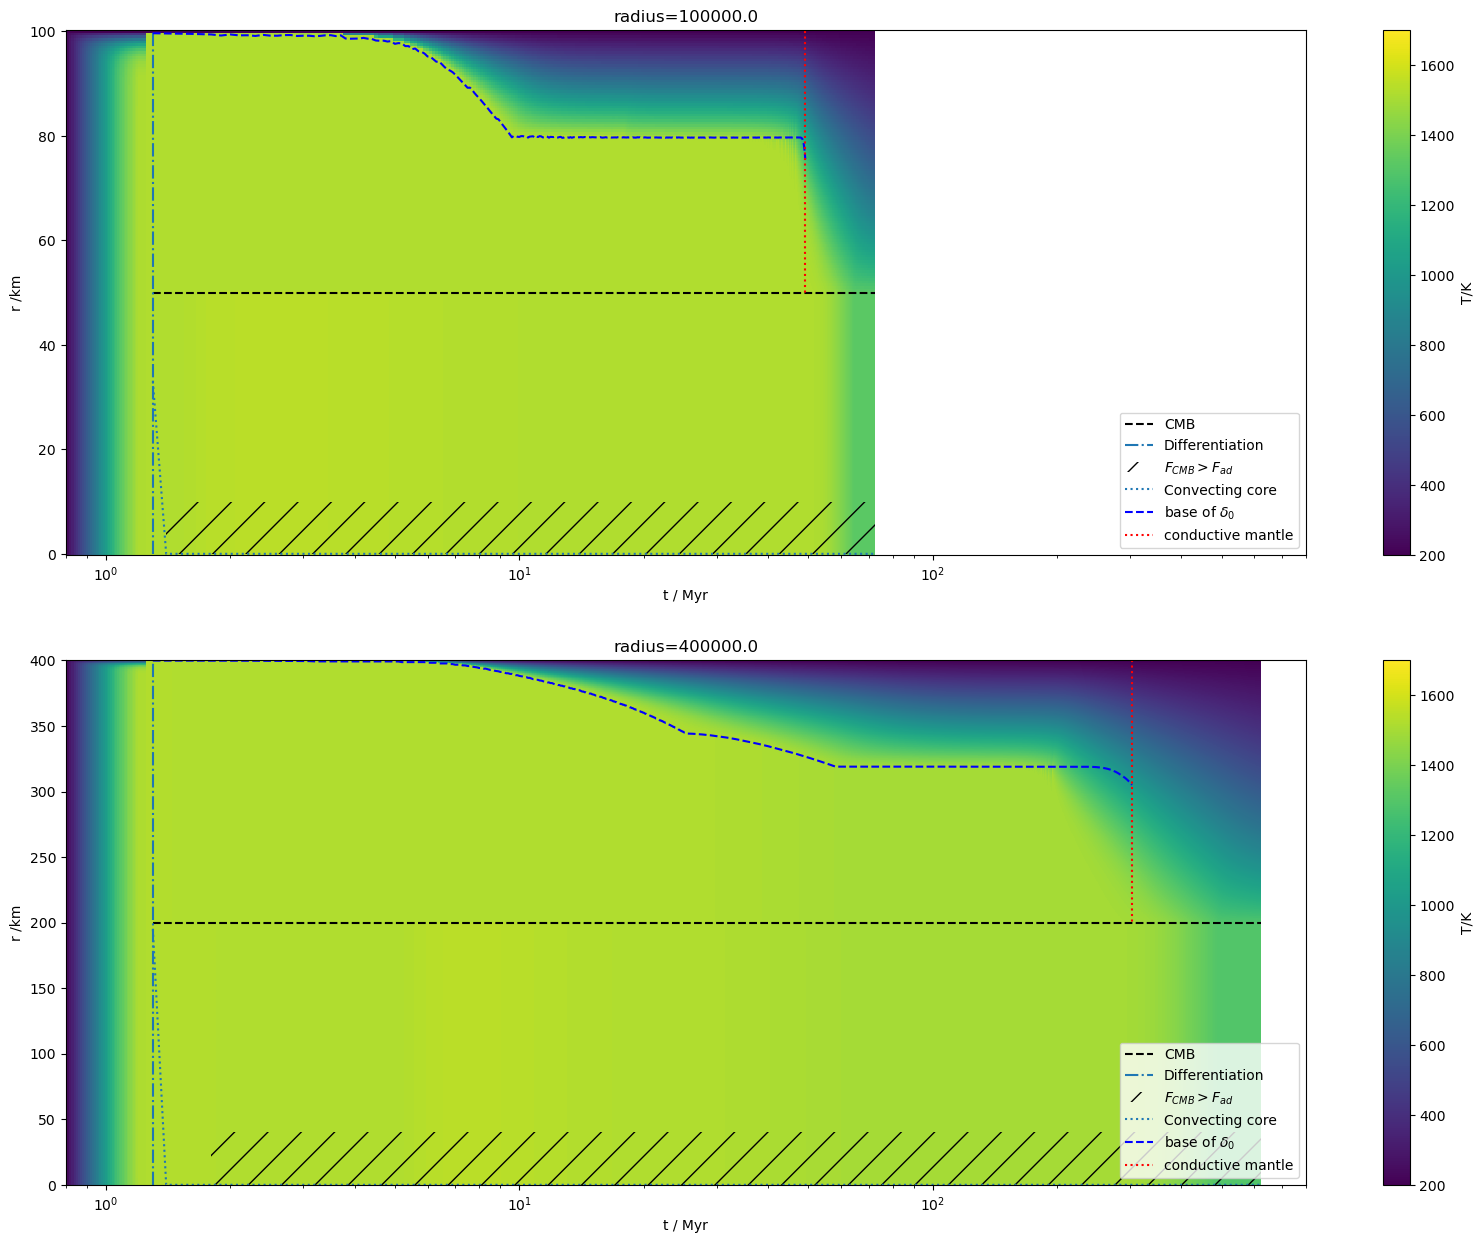

In [9]:
plt.figure(figsize=[20,15])
#subplot 1 - min value
plt.subplot(2,1,1)
plt.pcolormesh(tall_1,rplot_1,Tall_1,shading = 'gouraud',vmin=200,vmax=1700)
plt.hlines(rc1/1e3,min(t1),max(tall_1),linestyle='--',color='black',label='CMB')
plt.vlines(t1[0],0,r1/1e3,linestyle='-.',label='Differentiation')
plt.fill_betweenx([0,rc1/5e3],t1[np.where(Fcmb1>Fad1)[0]][0],t1[np.where(Fcmb1>Fad1)[0]][-1],alpha=0,hatch='/',label='$F_{CMB}>F_{ad}$')
plt.plot(t1,r_unstable1,linestyle='dotted',label='Convecting core')
plt.plot(t1[t1<=fcond_t1],(r1-d01[t1<=fcond_t1])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
plt.vlines(t1[t1<=fcond_t1][-1],r1/1e3,rc1/1e3,linestyle='dotted',label='conductive mantle',color='red')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,800])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var_data.loc[var_data['run']==minrun,var].values[0]}")
plt.xscale('log')
plt.legend(loc='lower right')

#subplot 2 - max value
plt.subplot(2,1,2)
plt.pcolormesh(tall_2,rplot_2,Tall_2,shading = 'gouraud',vmin=200,vmax=1700)
plt.hlines(rc2/1e3,min(t2),max(tall_2),linestyle='--',color='black',label='CMB')
plt.vlines(t2[0],0,r2/1e3,linestyle='-.',label='Differentiation')
plt.fill_betweenx([0,rc2/5e3],t2[np.where(Fcmb2>Fad2)[0]][0],t2[np.where(Fcmb2>Fad2)[0]][-1],alpha=0,hatch='/',label='$F_{CMB}>F_{ad}$')
plt.plot(t2,r_unstable2,linestyle='dotted',label='Convecting core')
plt.plot(t2[t2<=fcond_t2],(r2-d02[t2<=fcond_t2])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
plt.vlines(t2[t2<=fcond_t2][-1],r2/1e3,rc2/1e3,linestyle='dotted',label='conductive mantle',color='red')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,800])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var_data.loc[var_data['run']==maxrun,var].values[0]}")
plt.xscale('log')
plt.legend(loc='lower right')
if save == True:
    plt.savefig(f'../Plots/{folder}/Tcomp_{var}.png',bbox_inches='tight')

# Flux-time <a class="anchor" id="Ft"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Two endmembers

In [10]:
var1=var_data.loc[var_data['run']==minrun,var].values[0]
var2=var_data.loc[var_data['run']==maxrun,var].values[0]

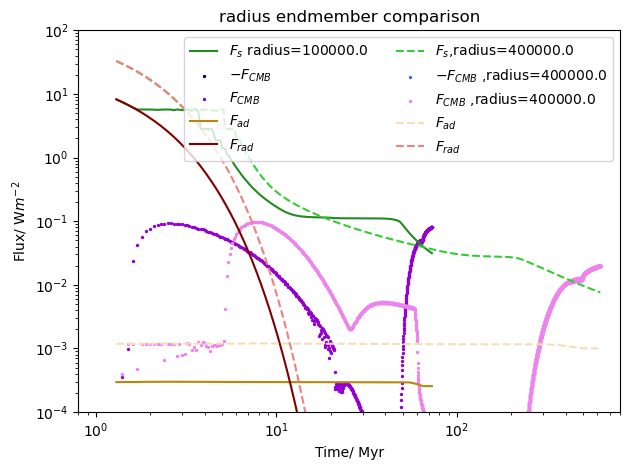

In [11]:
plt.figure(tight_layout=True)
#end member 1
plt.plot(t1,Fs1,label=f'$F_s$ {varlab}={var1}',color='forestgreen')
plt.scatter(t1[Fcmb1<0],abs(Fcmb1[Fcmb1<0]),label='$-F_{CMB}$',color='navy',s=2)
plt.scatter(t1[Fcmb1>0],Fcmb1[Fcmb1>0],label='$F_{CMB}$',color='darkviolet',s=2)
plt.plot(t1,Fad1,label='$F_{ad}$',color='darkgoldenrod')
plt.plot(t1,Frad1,label='$F_{rad}$',color='maroon')

#end member 2
plt.plot(t2,Fs2,label=f"$F_s$,{varlab}={var2}",linestyle='dashed',color='limegreen')
plt.scatter(t2[Fcmb2<0],abs(Fcmb2[Fcmb2<0]),label=f'$-F_{{CMB}}$ ,{varlab}={var2}',color='royalblue',s=2)
plt.scatter(t2[Fcmb2>0],Fcmb2[Fcmb2>0],label=f'$F_{{CMB}}$ ,{varlab}={var2}',color='violet',s=2)
plt.plot(t2,Fad2,linestyle='dashed',color='wheat',label='$F_{ad}$')
plt.plot(t2,Frad2,linestyle='dashed',color='lightcoral',label='$F_{rad}$')
plt.xlabel('Time/ Myr')
plt.xlim([0.8,800])
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)
plt.title(f'{varlab} endmember comparison')
if save == True:
    plt.savefig(f'../Plots/{folder}Tflux_endcomp{var}.png',dpi=450)


# Rem and core size <a class="anchor" id="Rt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [12]:
colors = ['black','darkblue','blue','royalblue','cornflowerblue','paleturquoise','salmon','maroon']

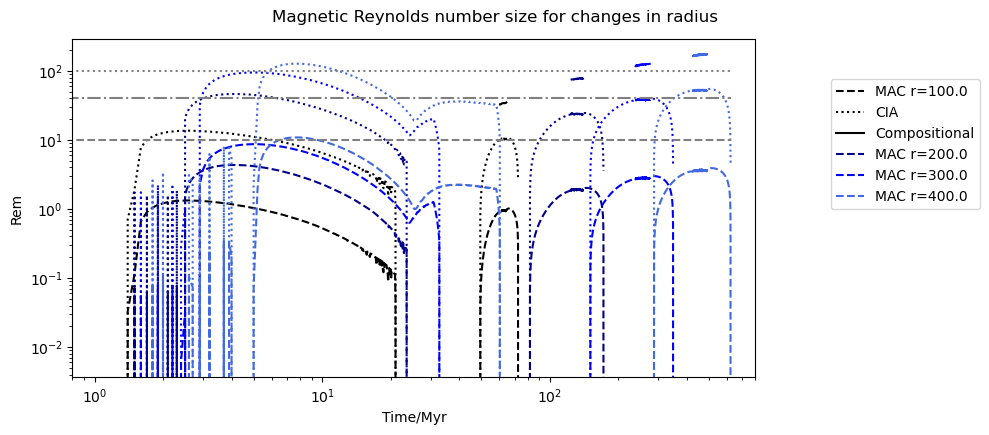

In [13]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Magnetic Reynolds number size for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    therm = npzfile['therm'] # magnetic Reynolds number, Bfield and time [Myr] from thermal convection 
    comp = npzfile['comp'] # magnetic Reynolds number, Bfield and time [Myr] from compositional convection 
    Rem_t = therm[0,:] #Thermal Rem
    Rem_c = comp[0,:] #Thermo-compositional Rem (f<f0)
    therm_t = therm[2,:]
    comp_t = comp[2,:]
    if i==0: #label for key
        plt.loglog(therm_t,Rem_t,label='Thermal',color=colors[i],linestyle='dotted')
        plt.loglog(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],label='Compositional',color=colors[i])
    else: #no labels
        plt.loglog(therm_t,Rem_t,color=colors[i],linestyle='dotted')
        plt.loglog(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],color=colors[i])
        
plt.hlines(10,xmin=0,xmax=comp_t[-1],color='gray',linestyle='--')
plt.hlines(40,xmin=0,xmax=comp_t[-1],color='gray',linestyle='-.')
plt.hlines(100,xmin=0,xmax=comp_t[-1],color='gray',linestyle='dotted')
plt.xlabel('Time/Myr')
plt.ylabel('Rem')
plt.legend(bbox_to_anchor=[1.1,0.9])
plt.xscale('log')
plt.xlim([0.8,800])

if save == True:
    plt.savefig(f'../Plots/{folder}Rem_{var}.png',dpi=450,bbox_inches='tight')

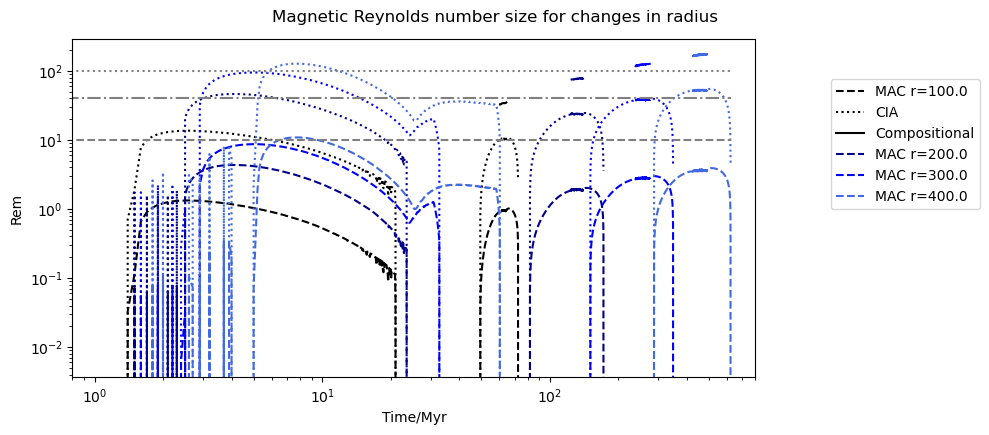

In [13]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Magnetic Reynolds number size for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    therm = npzfile['therm'] # magnetic Reynolds number, Bfield and time [Myr] from thermal convection 
    comp = npzfile['comp'] # magnetic Reynolds number, Bfield and time [Myr] from compositional convection 
    Btherm = therm[1,:]
    Bcomp = comp[1,:]
    therm_t = therm[2,:]
    comp_t = comp[2,:]
    if i==0: #label for key
        plt.loglog(therm_t,Btherm,label='Thermal',color=colors[i],linestyle='dotted')
        plt.loglog(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],label='Compositional',color=colors[i])
    else: #no labels
        plt.loglog(therm_t,Btherm,color=colors[i],linestyle='dotted')
        plt.loglog(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],color=colors[i])
        
plt.xlabel('Time/Myr')
plt.ylabel('Surface dipole field strength $\\mu$T')
plt.legend(bbox_to_anchor=[1.1,0.9])
plt.xscale('log')

if save == True:
    plt.savefig(f'../Plots/{folder}B_{var}.png',dpi=450,bbox_inches='tight')

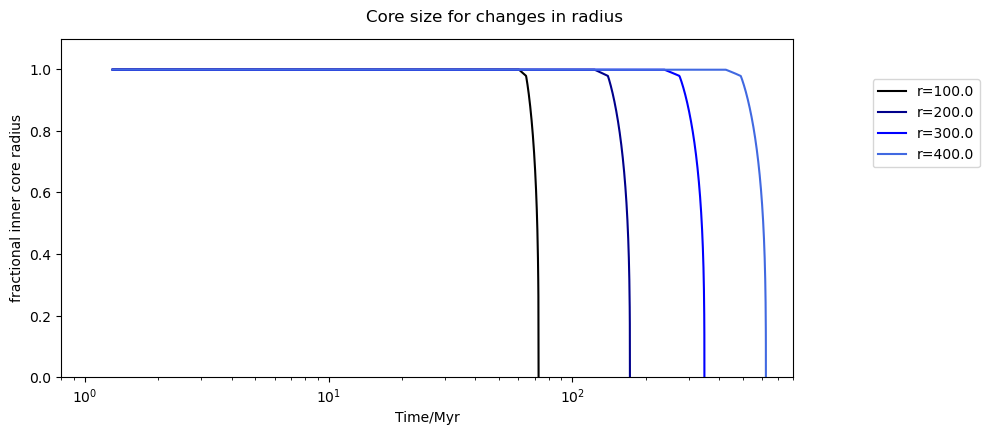

In [14]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Core size for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    f = npzfile['f']
    plt.plot(t,f,label=f'{var}={varval}',color=colors[i])
plt.xlabel('Time/Myr')
plt.ylabel('fractional inner core radius')
plt.legend(bbox_to_anchor=[1.1,0.9])
plt.xscale('log')
plt.xlim([0.8,800])
plt.ylim([0,1.1])
if save == True:
    plt.savefig(f'../Plots/{folder}f_{var}.png',dpi=450,bbox_inches='tight')

# Timings <a class="anchor" id="time"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

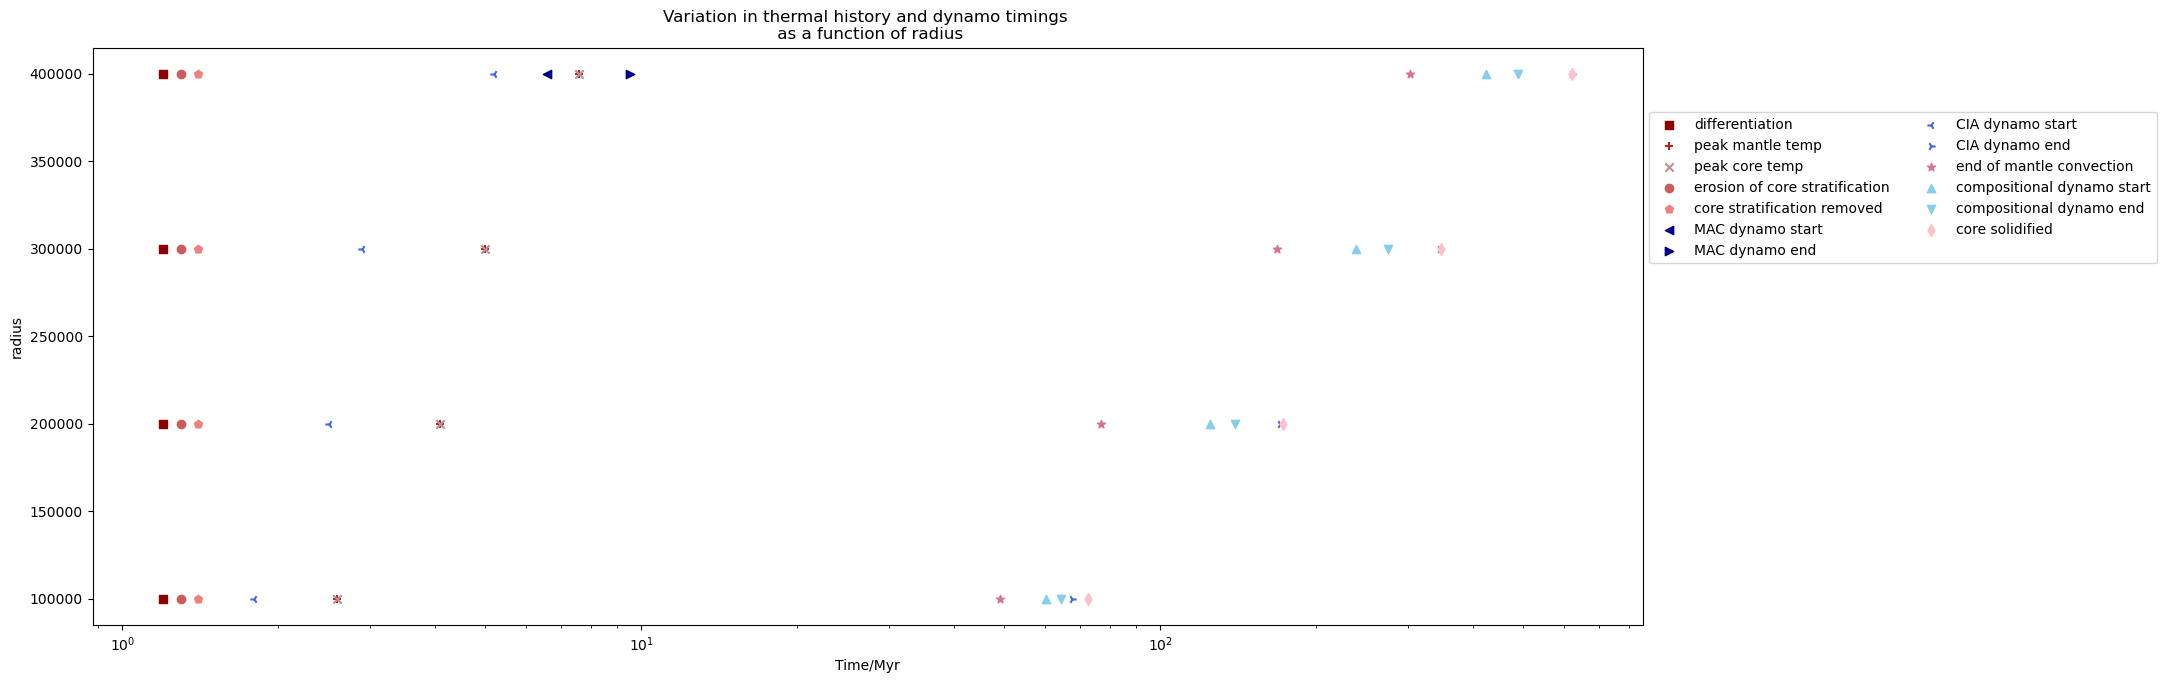

In [15]:
plt.figure(figsize=[20,7.5])
plt.title(f'Variation in thermal history and dynamo timings \n as a function of {varlab}')
plt.scatter(data['diff_time'],data[var],label='differentiation',marker='s',color='darkred')
plt.scatter(data['tmax'],data[var],label='peak mantle temp',marker='+',color='firebrick')
plt.scatter(data['tcoremax'],data[var],label='peak core temp',marker='x',color='rosybrown')
plt.scatter(data['tstrat_remove'],data[var],label='erosion of core stratification',marker='o',color='indianred')
plt.scatter(data['terode'],data[var],label='core stratification removed',marker='p',color='lightcoral')
plt.scatter(data['therm_on'],data[var],label='Thermal dynamo start',marker='<',color='darkblue')
plt.scatter(data['therm_off'],data[var],label='Thermal dynamo end',marker='>',color='darkblue')
plt.scatter(data['fcond_t'],data[var],label='end of mantle convection',marker='*',color='palevioletred')
plt.scatter(data['comp_on'],data[var],label='compositional dynamo start',marker='^',color='skyblue')
plt.scatter(data['comp_off'],data[var],label='compositional dynamo end',marker='v',color='skyblue')
plt.scatter(data['tsolid'],data[var],label='core solidified',marker='d',color='pink')
plt.xlabel('Time/Myr')
plt.xscale('log')
if logvar == True:
    plt.yscale('log')
plt.ylabel(varlab)
plt.legend(ncols=2,bbox_to_anchor=(1,0.9))
if save == True:
    plt.savefig(f'../Plots/{folder}all_timings_{var}.png',dpi=450,bbox_inches='tight') 